In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.colors as mcolors

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Read the CSV file
data = pd.read_csv('HEARTRATE_AUTO/HEARTRATE_AUTO_1716876100735.csv')

# Convert the date and time columns to datetime format
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])

# Extract the hour and minute from the datetime column


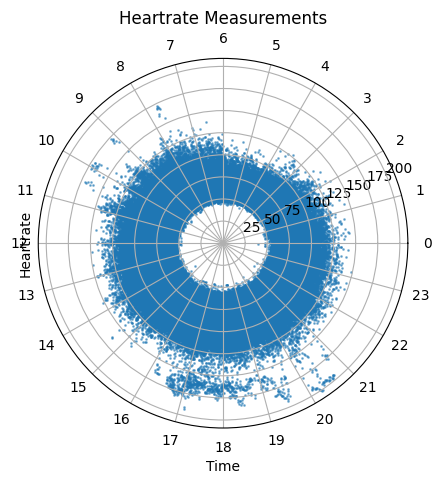

In [2]:


# Convert the date and time columns to datetime format
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])

# Extract the hour and minute from the datetime column
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute

# Calculate the angle for each data point (in radians)
data['angle'] = (data['hour'] * 60 + data['minute']) / 1440 * 2 * np.pi

# Create a polar plot
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))

# Plot the data points
ax.scatter(data['angle'], data['heartRate'], s=1, alpha=0.5)

# Set the plot title and labels
ax.set_title('Heartrate Measurements')
ax.set_xlabel('Time')
ax.set_ylabel('Heartrate')

# Set the radial ticks and labels
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24))

# Show the plot
plt.show()

In [3]:
base_cmap = sns.color_palette("rocket", as_cmap=True)

# Extract colors from the base colormap
base_colors = base_cmap(np.linspace(0, 1, 256))

# Create a new colormap with transparency
alpha = np.linspace(0, 1, 256)  # Gradual increase in alpha
new_colors = np.zeros((256, 4))
new_colors[:, :3] = base_colors[:, :3]  # Copy the RGB values
new_colors[:, 3] = alpha  # Set the alpha values

# Create the new colormap
new_cmap = mcolors.ListedColormap(new_colors)

In [4]:

# Load the data
data['datetimey'] = pd.to_datetime(data['date'] + ' ' + data['time'])

# Set datetime as the index
data.set_index('datetimey', inplace=True)

# Combine date and time into a single datetime column
def calculateAverage():
    
    # Extract the time part only for grouping purposes
    data['time'] = data.index.time

    # Resample the data in 15-minute intervals across all days
    data['time'] = data['time'].apply(lambda t: pd.Timestamp(t.hour*3600 + t.minute*60, unit='s').floor('5T').time())

    # Group by the 15-minute intervals and calculate the mean heart rate for each interval across all days
    average_hr = data.groupby('time')['heartRate'].mean()
    times = average_hr.index

    # Calculate the angle for each time point
    angles = [2 * np.pi * (t.hour + t.minute / 60) / 24 for t in times]
    return angles,average_hr
angles, average_hr = calculateAverage()




/var/folders/ch/4w1x88c120g72bpx7rj47ktw0000gn/T/ipykernel_20903/932599368.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data['time'] = data['time'].apply(lambda t: pd.Timestamp(t.hour*3600 + t.minute*60, unit='s').floor('5T').time())


/var/folders/ch/4w1x88c120g72bpx7rj47ktw0000gn/T/ipykernel_20903/241920432.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['datetime_rounded'] = filtered_data['datetime'].dt.floor('15min')


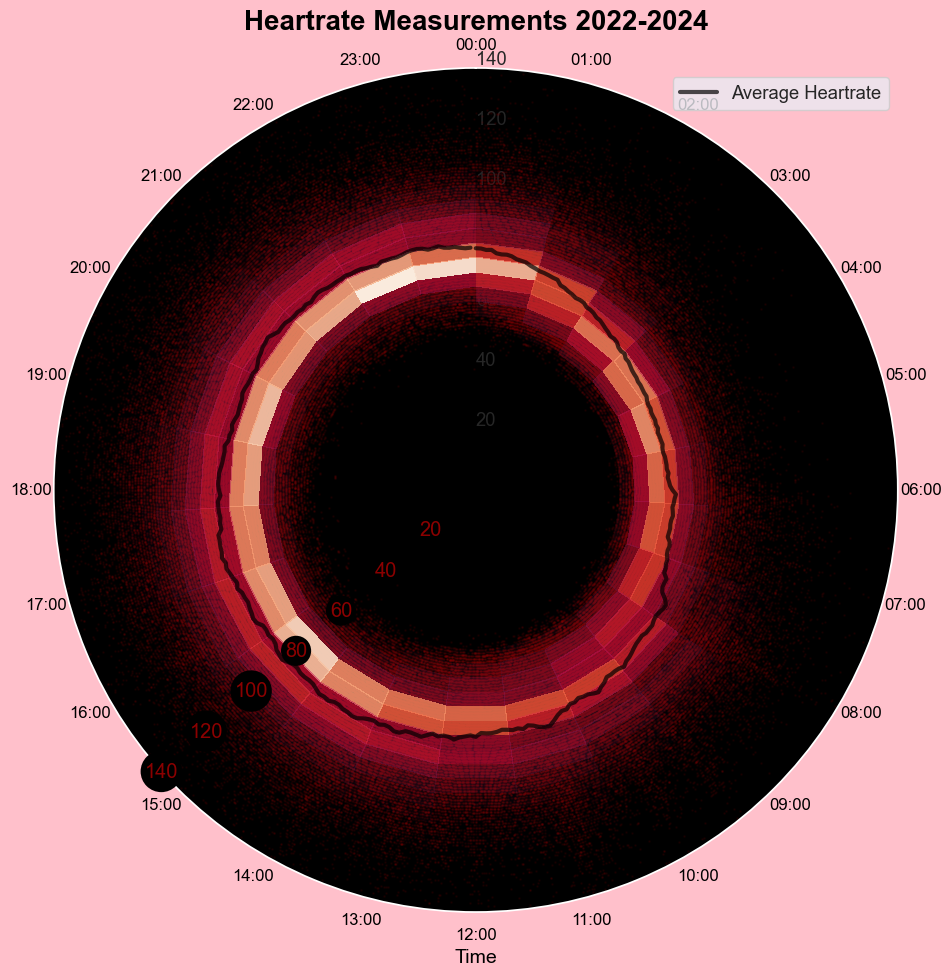

In [5]:
import random

# Assuming you have already loaded the data into the 'data' DataFrame
# and performed the necessary data preprocessing steps

# Set the maximum radius limit
max_radius = 140

# Filter the data based on the maximum radius
filtered_data = data[data['heartRate'] <= max_radius]

# Define binning
rbins = np.linspace(0, max_radius, 30)
abins = np.linspace(0, 2*np.pi, 24)

# Calculate histogram

hist, _, _ = np.histogram2d(filtered_data['angle'], filtered_data['heartRate'], bins=(abins, rbins))
A, R = np.meshgrid(abins, rbins)

# Create a polar plot with a dark background
sns.set_theme(style="darkgrid", font_scale=1.2)

fig, ax = plt.subplots(subplot_kw=dict(projection="polar"), figsize=(10, 10))

# Plot the histogram using pcolormesh with transparency
# cmap = sns.color_palette("rocket", as_cmap=True)
# cmap.set_under(alpha=0)
fig.patch.set_facecolor('black')  # Set the figure background to black

ax.scatter(data['angle'], data['heartRate'], s=1, alpha=0.1,color = 'darkred')

pc = ax.pcolormesh(A, R, hist.T, cmap=new_cmap, vmin=1)

# Calculate average heartrate for every 15 minutes
filtered_data['datetime_rounded'] = filtered_data['datetime'].dt.floor('15min')

# Plot the line representing the average heartrate for every 15 minutes
ax.plot(angles, average_hr, color='black', linewidth=3, alpha=0.7,label = 'Average Heartrate')

# Set the plot title and labels with a custom font
title_font = {'fontname': 'Arial', 'size': 20, 'color': 'Black', 'weight': 'bold'}
label_font = {'fontname': 'Arial', 'size': 14, 'color': 'Black'}
ax.set_title('Heartrate Measurements 2022-2024', fontdict=title_font)
ax.set_xlabel('Time', fontdict=label_font)

# Set the theta ticks and labels with a custom font
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels([f'{i:02d}:00' for i in range(24)], fontdict={'fontname': 'Arial', 'size': 12, 'color': 'black'})

# Set the radial limit and ticks with a custom font
ax.set_ylim(0, max_radius)
yticks = ax.get_yticks()
for tick in yticks:
    # Get the angle for each tick
    angle = -40  # Polar plots often place y-ticks at angle 0 (radial direction)
    # Add a black circle behind each y-tick label
    ax.text(angle, tick, f'{int(tick)}', ha='center', va='center', color='darkred', 
            bbox=dict(facecolor='black', edgecolor='none', boxstyle='circle,pad=0.2'),
            zorder=10)  # Ensure text is in front

# Move y-ticks to front
ax.set_rlabel_position(0)
ax.tick_params(axis='y', which='major', zorder=11)

# Set the theta zero location and direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Set the background color of the plot
ax.set_facecolor('black')
fig.patch.set_facecolor('pink')
# Add abstract shapes to the figure background

# Customize the plot appearance
plt.tight_layout()
plt.legend()
plt.show()

In [6]:
pc = ax.pcolormesh(R, A, hist.T, cmap=new_cmap, vmin=hist.min(), vmax=hist.max())
cbar = fig.colorbar(pc, ax=ax)

# Modify the colorbar to show transparency effect
cbar_ticks = np.linspace(0, 1, 256)
cbar_alpha = np.linspace(0, 1, 256)
cbar_colors = np.zeros((256, 4))
cbar_colors[:, :3] = base_colors[:, :3]  # Use the same base colors
cbar_colors[:, 3] = cbar_alpha 
cbar_cmap = mcolors.ListedColormap(cbar_colors)

# Replace the colorbar with the new one
cbar = fig.colorbar(mcolors.ScalarMappable(norm=pc.norm, cmap=cbar_cmap), ax=ax)


AttributeError: module 'matplotlib.colors' has no attribute 'ScalarMappable'